In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# url of the excel sheet is "https://docs.google.com/spreadsheets/d/1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8/edit?usp=sharing"

excel = pd.ExcelFile('Batchwise Attendance Data.xlsx')
sheets = {}
all_data = pd.DataFrame()
for sheet_name in excel.sheet_names:
    sheets[sheet_name] = excel.parse(sheet_name)
    df = pd.DataFrame(sheets[sheet_name])
    df['Class'] = sheet_name
    all_data = all_data.append(df, ignore_index=True)

print(all_data.head())
print(all_data.tail())

   Student Roll Num     Type 2021-01-10 00:00:00  R-10-01-21  \
0                 1  WORKING              Missed          10   
1                 2      NaN              Missed           6   
2                 3  STUDENT              Missed          10   
3                 4  STUDENT              Missed           5   
4                 5  WORKING              Missed          10   

  2021-01-09 00:00:00  R-9-01-21 2021-01-08 00:00:00  R-8-01-21  \
0              Missed          6              Missed          8   
1              Missed          7              Missed          8   
2              Missed         10              Missed          5   
3              Missed         10            Attended          5   
4              Missed          6              Missed          5   

  2021-01-07 00:00:00  R-7-01-21  ... R-5-01-21  2021-01-04 00:00:00  \
0              Missed          7  ...         7               Missed   
1            Attended          7  ...         6             Attended

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student Roll Num     127 non-null    int64  
 1   Type                 62 non-null     object 
 2   2021-01-10 00:00:00  127 non-null    object 
 3   R-10-01-21           127 non-null    int64  
 4   2021-01-09 00:00:00  127 non-null    object 
 5   R-9-01-21            127 non-null    int64  
 6   2021-01-08 00:00:00  127 non-null    object 
 7   R-8-01-21            127 non-null    int64  
 8   2021-01-07 00:00:00  125 non-null    object 
 9   R-7-01-21            127 non-null    int64  
 10  2021-01-06 00:00:00  125 non-null    object 
 11  R-6-01-21            127 non-null    int64  
 12  2021-01-05 00:00:00  125 non-null    object 
 13  R-5-01-21            127 non-null    int64  
 14  2021-01-04 00:00:00  125 non-null    object 
 15  R-4-01-21            127 non-null    int

In [7]:
all_data['Type'].fillna("STUDENT", inplace=True)
all_data.isnull().sum() / len(all_data) * 100

Student Roll Num        0.000000
Type                    0.000000
2021-01-10 00:00:00     0.000000
R-10-01-21              0.000000
2021-01-09 00:00:00     0.000000
R-9-01-21               0.000000
2021-01-08 00:00:00     0.000000
R-8-01-21               0.000000
2021-01-07 00:00:00     1.574803
R-7-01-21               0.000000
2021-01-06 00:00:00     1.574803
R-6-01-21               0.000000
2021-01-05 00:00:00     1.574803
R-5-01-21               0.000000
2021-01-04 00:00:00     1.574803
R-4-01-21               0.000000
2021-01-03 00:00:00     3.149606
R-3-01-21               0.000000
2021-01-02 00:00:00    55.905512
R-02-01-21             55.118110
2021-01-01 00:00:00    55.905512
R-01-01-21             55.118110
Class                   0.000000
dtype: float64

In [8]:
all_data['R-01-01-21'].fillna(0, inplace=True)
all_data['R-02-01-21'].fillna(0, inplace=True)
all_data.isnull().sum() / len(all_data) * 100

Student Roll Num        0.000000
Type                    0.000000
2021-01-10 00:00:00     0.000000
R-10-01-21              0.000000
2021-01-09 00:00:00     0.000000
R-9-01-21               0.000000
2021-01-08 00:00:00     0.000000
R-8-01-21               0.000000
2021-01-07 00:00:00     1.574803
R-7-01-21               0.000000
2021-01-06 00:00:00     1.574803
R-6-01-21               0.000000
2021-01-05 00:00:00     1.574803
R-5-01-21               0.000000
2021-01-04 00:00:00     1.574803
R-4-01-21               0.000000
2021-01-03 00:00:00     3.149606
R-3-01-21               0.000000
2021-01-02 00:00:00    55.905512
R-02-01-21              0.000000
2021-01-01 00:00:00    55.905512
R-01-01-21              0.000000
Class                   0.000000
dtype: float64

In [12]:
all_data.columns = all_data.columns.astype(str)

In [13]:
new_column_names = {
    '2021-01-10 00:00:00': 'JanTen',
    '2021-01-09 00:00:00': 'JanNine',
    '2021-01-08 00:00:00': 'JanEight',
    '2021-01-07 00:00:00': 'JanSeven',
    '2021-01-06 00:00:00': 'JanSix',
    '2021-01-05 00:00:00': 'JanFive',
    '2021-01-04 00:00:00': 'JanFour',
    '2021-01-03 00:00:00': 'JanThree',
    '2021-01-02 00:00:00': 'JanTwo',
    '2021-01-01 00:00:00': 'JanOne'
}

In [14]:
all_data.rename(columns=new_column_names, inplace=True)
all_data.head()

,Student Roll Num,Type,JanTen,R-10-01-21,JanNine,R-9-01-21,JanEight,R-8-01-21,JanSeven,R-7-01-21,...,R-5-01-21,JanFour,R-4-01-21,JanThree,R-3-01-21,JanTwo,R-02-01-21,JanOne,R-01-01-21,Class
0,1,WORKING,Missed,10,Missed,6,Missed,8,Missed,7,...,7,Missed,10,Missed,7,Missed,9.0,Missed,5.0,Class 1
1,2,STUDENT,Missed,6,Missed,7,Missed,8,Attended,7,...,6,Attended,8,Missed,7,Attended,5.0,Missed,5.0,Class 1
2,3,STUDENT,Missed,10,Missed,10,Missed,5,Missed,7,...,8,Missed,9,Missed,8,Attended,7.0,Attended,5.0,Class 1
3,4,STUDENT,Missed,5,Missed,10,Attended,5,Missed,10,...,8,Attended,7,Attended,8,Attended,6.0,Attended,7.0,Class 1
4,5,WORKING,Missed,10,Missed,6,Missed,5,Missed,10,...,9,Missed,9,Missed,10,Missed,10.0,Missed,8.0,Class 1


In [15]:
all_data['JanSeven'].fillna("Missed", inplace=True)
all_data['JanSix'].fillna("Missed", inplace=True)
all_data['JanFive'].fillna("Missed", inplace=True)
all_data['JanFour'].fillna("Missed", inplace=True)
all_data['JanThree'].fillna("Missed", inplace=True)
all_data['JanTwo'].fillna("Missed", inplace=True)
all_data['JanOne'].fillna("Missed", inplace=True)
all_data.isnull().sum() / len(all_data) * 100

Student Roll Num    0.0
Type                0.0
JanTen              0.0
R-10-01-21          0.0
JanNine             0.0
R-9-01-21           0.0
JanEight            0.0
R-8-01-21           0.0
JanSeven            0.0
R-7-01-21           0.0
JanSix              0.0
R-6-01-21           0.0
JanFive             0.0
R-5-01-21           0.0
JanFour             0.0
R-4-01-21           0.0
JanThree            0.0
R-3-01-21           0.0
JanTwo              0.0
R-02-01-21          0.0
JanOne              0.0
R-01-01-21          0.0
Class               0.0
dtype: float64

In [21]:
new_column_names = {
    'R-10-01-21': 'R-JanTen',
    'R-9-01-21': 'R-JanNine',
    'R-8-01-21': 'R-JanEight',
    'R-7-01-21': 'R-JanSeven',
    'R-6-01-21': 'R-JanSix',
    'R-5-01-21': 'R-JanFive',
    'R-4-01-21': 'R-JanFour',
    'R-3-01-21': 'R-JanThree',
    'R-02-01-21': 'R-JanTwo',
    'R-01-01-21': 'R-JanOne'
}
all_data.rename(columns=new_column_names, inplace=True)
all_data.head()

,Student Roll Num,Type,JanTen,R-JanTen,JanNine,R-JanNine,JanEight,R-JanEight,JanSeven,R-JanSeven,...,R-JanFive,JanFour,R-JanFour,JanThree,R-JanThree,JanTwo,R-JanTwo,JanOne,R-JanOne,Class
0,1,WORKING,Missed,10,Missed,6,Missed,8,Missed,7,...,7,Missed,10,Missed,7,Missed,9.0,Missed,5.0,Class 1
1,2,STUDENT,Missed,6,Missed,7,Missed,8,Attended,7,...,6,Attended,8,Missed,7,Attended,5.0,Missed,5.0,Class 1
2,3,STUDENT,Missed,10,Missed,10,Missed,5,Missed,7,...,8,Missed,9,Missed,8,Attended,7.0,Attended,5.0,Class 1
3,4,STUDENT,Missed,5,Missed,10,Attended,5,Missed,10,...,8,Attended,7,Attended,8,Attended,6.0,Attended,7.0,Class 1
4,5,WORKING,Missed,10,Missed,6,Missed,5,Missed,10,...,9,Missed,9,Missed,10,Missed,10.0,Missed,8.0,Class 1


In [22]:
satisfaction_columns = ['R-JanTen', 'R-JanNine', 'R-JanEight', 'R-JanSeven', 'R-JanSix', 'R-JanFive', 'R-JanFour', 'R-JanThree', 'R-JanTwo', 'R-JanOne']
all_data['Average_Satisfaction'] = all_data[satisfaction_columns].mean(axis = 1)
print(all_data.head())
print(all_data.info())

   Student Roll Num     Type  JanTen  R-JanTen JanNine  R-JanNine  JanEight  \
0                 1  WORKING  Missed        10  Missed          6    Missed   
1                 2  STUDENT  Missed         6  Missed          7    Missed   
2                 3  STUDENT  Missed        10  Missed         10    Missed   
3                 4  STUDENT  Missed         5  Missed         10  Attended   
4                 5  WORKING  Missed        10  Missed          6    Missed   

   R-JanEight  JanSeven  R-JanSeven  ...   JanFour  R-JanFour  JanThree  \
0           8    Missed           7  ...    Missed         10    Missed   
1           8  Attended           7  ...  Attended          8    Missed   
2           5    Missed           7  ...    Missed          9    Missed   
3           5    Missed          10  ...  Attended          7  Attended   
4           5    Missed          10  ...    Missed          9    Missed   

   R-JanThree    JanTwo  R-JanTwo    JanOne  R-JanOne    Class  \
0       

In [23]:
def satisfaction_level(rating):
    if rating >= 7:
        return 'Very Satisfied'
    elif rating > 4:
        return 'Satisfied'
    else:
        return 'Unsatisfied'

all_data['Satisfaction_Level'] = all_data['Average_Satisfaction'].apply(satisfaction_level)
all_data.head()

,Student Roll Num,Type,JanTen,R-JanTen,JanNine,R-JanNine,JanEight,R-JanEight,JanSeven,R-JanSeven,...,R-JanFour,JanThree,R-JanThree,JanTwo,R-JanTwo,JanOne,R-JanOne,Class,Average_Satisfaction,Satisfaction_Level
0,1,WORKING,Missed,10,Missed,6,Missed,8,Missed,7,...,10,Missed,7,Missed,9.0,Missed,5.0,Class 1,7.9,Very Satisfied
1,2,STUDENT,Missed,6,Missed,7,Missed,8,Attended,7,...,8,Missed,7,Attended,5.0,Missed,5.0,Class 1,6.5,Satisfied
2,3,STUDENT,Missed,10,Missed,10,Missed,5,Missed,7,...,9,Missed,8,Attended,7.0,Attended,5.0,Class 1,7.7,Very Satisfied
3,4,STUDENT,Missed,5,Missed,10,Attended,5,Missed,10,...,7,Attended,8,Attended,6.0,Attended,7.0,Class 1,7.1,Very Satisfied
4,5,WORKING,Missed,10,Missed,6,Missed,5,Missed,10,...,9,Missed,10,Missed,10.0,Missed,8.0,Class 1,8.2,Very Satisfied


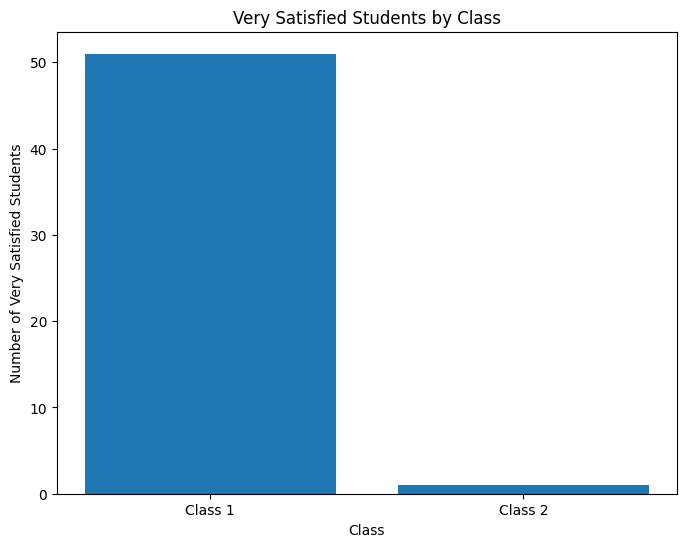

In [41]:
very_satisfied_students = all_data[all_data['Satisfaction_Level'] == 'Very Satisfied']
very_satisfied_counts = very_satisfied_students.groupby('Class')['Student Roll Num'].count()

plt.figure(figsize=(8, 6))
plt.bar(very_satisfied_counts.index, very_satisfied_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Very Satisfied Students')
plt.title('Very Satisfied Students by Class')
plt.show()

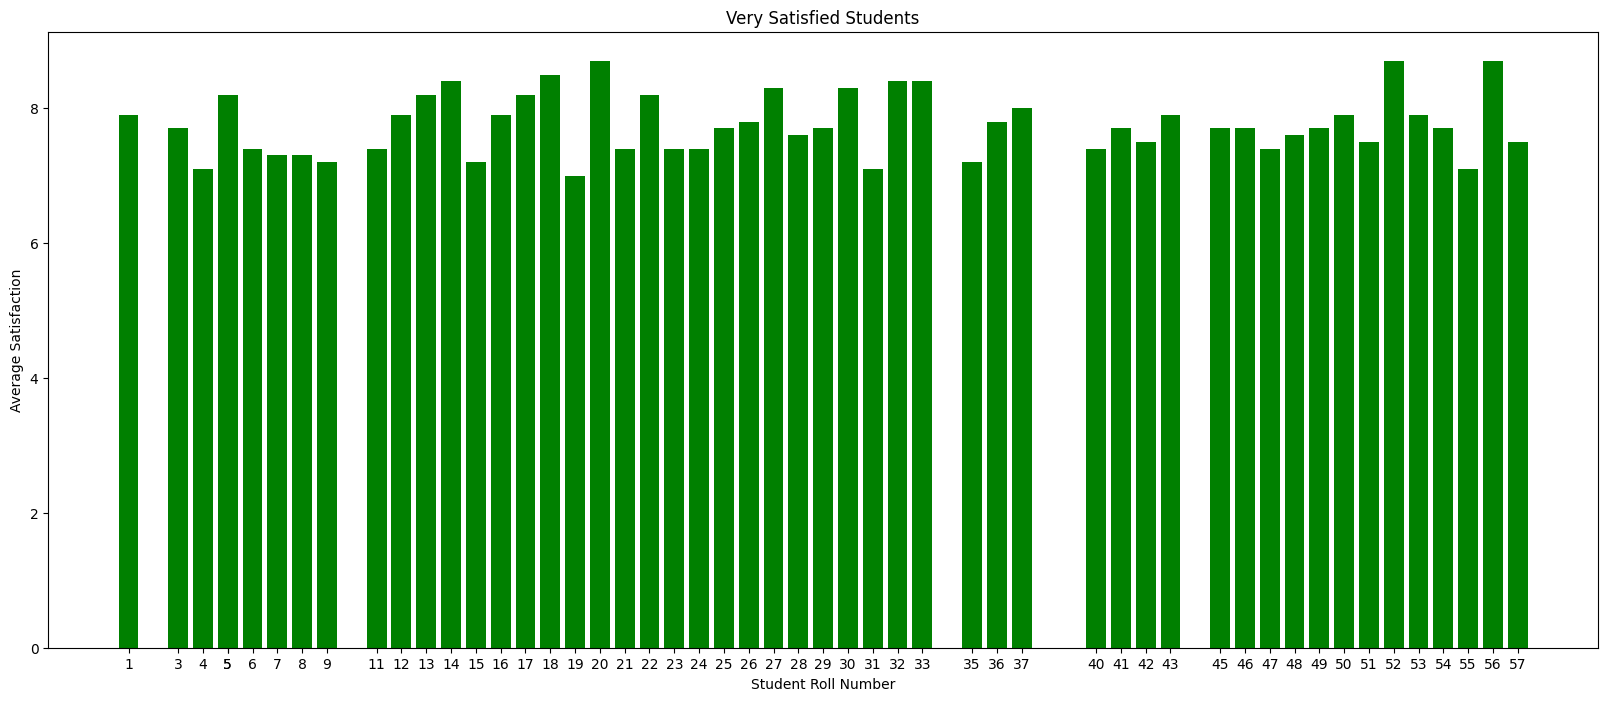

In [43]:
plt.figure(figsize=(20, 8))
plt.bar(very_satisfied_students['Student Roll Num'], very_satisfied_students['Average_Satisfaction'], color='green')
plt.xlabel('Student Roll Number')
plt.ylabel('Average Satisfaction')
plt.title('Very Satisfied Students')
plt.xticks(very_satisfied_students['Student Roll Num'])
plt.show()

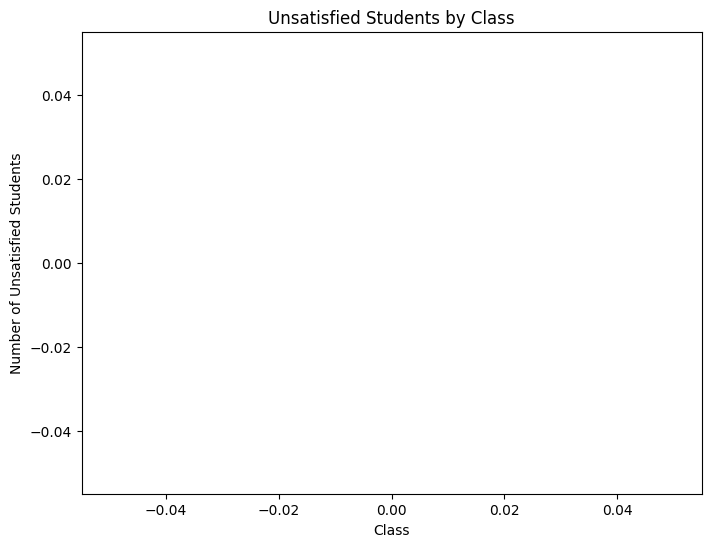

In [46]:
unsatisfied_students = all_data[all_data['Satisfaction_Level'] == 'Unsatisfied']
unsatisfied_counts = unsatisfied_students.groupby('Class')['Student Roll Num'].count()

plt.figure(figsize=(8, 6))
plt.bar(unsatisfied_counts.index, unsatisfied_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Unsatisfied Students')
plt.title('Unsatisfied Students by Class')
plt.show()

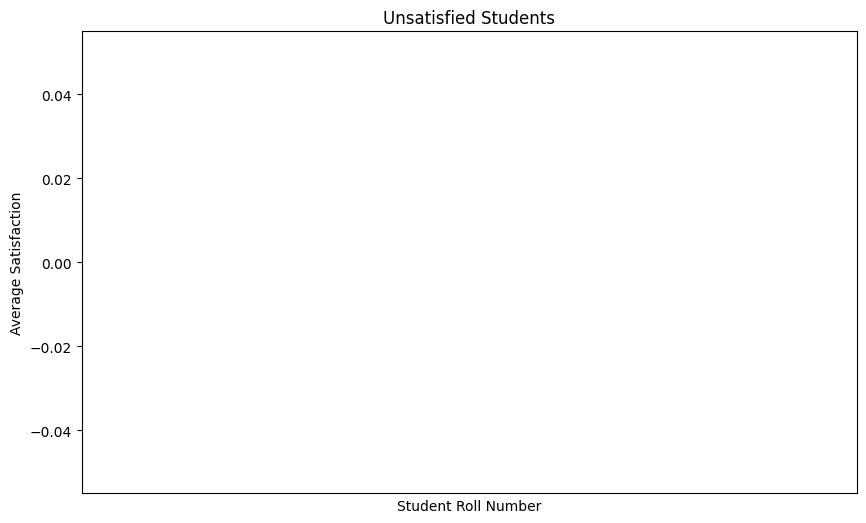

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(unsatisfied_students['Student Roll Num'], unsatisfied_students['Average_Satisfaction'], color='green')
plt.xlabel('Student Roll Number')
plt.ylabel('Average Satisfaction')
plt.title('Unsatisfied Students')
plt.xticks(unsatisfied_students['Student Roll Num'])
plt.show()

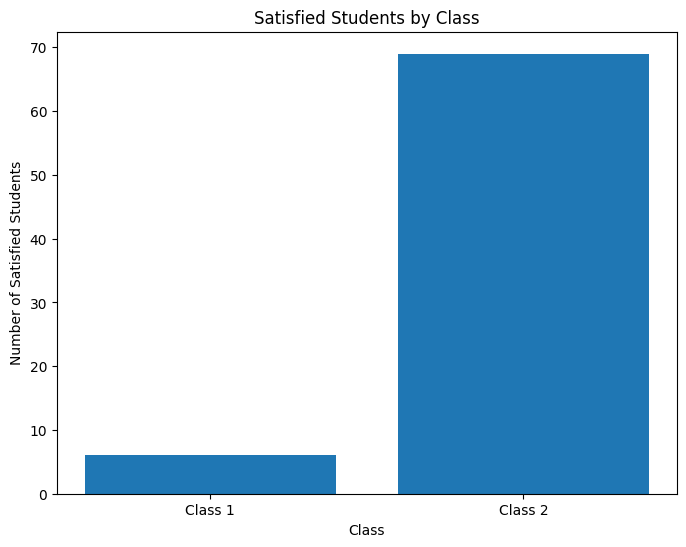

In [50]:
satisfied_students = all_data[all_data['Satisfaction_Level'] == 'Satisfied']
satisfied_counts = satisfied_students.groupby('Class')['Student Roll Num'].count()

plt.figure(figsize=(8, 6))
plt.bar(satisfied_counts.index, satisfied_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Satisfied Students')
plt.title('Satisfied Students by Class')
plt.show()

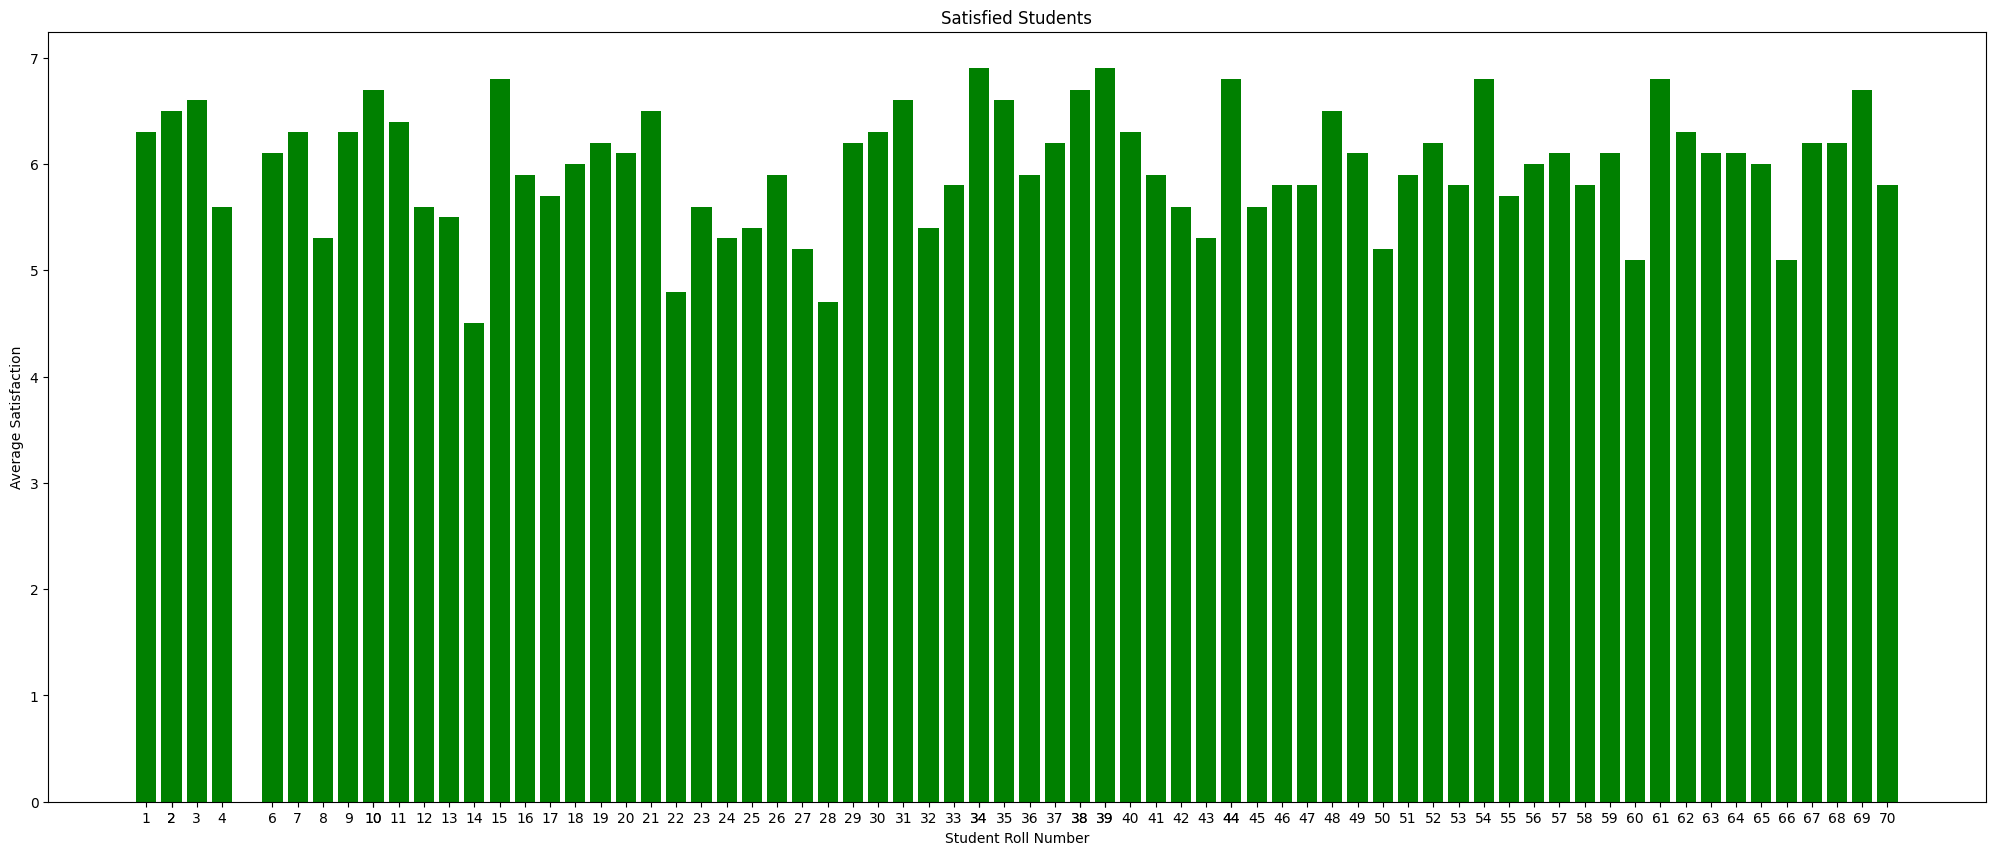

In [56]:
plt.figure(figsize=(25, 10))
plt.bar(satisfied_students['Student Roll Num'], satisfied_students['Average_Satisfaction'], color='green')
plt.xlabel('Student Roll Number')
plt.ylabel('Average Satisfaction')
plt.title('Satisfied Students')
plt.xticks(satisfied_students['Student Roll Num'])
plt.show()

In [57]:
day_columns = ['JanTen', 'JanNine', 'JanEight', 'JanSeven', 'JanSix', 'JanFive', 'JanFour', 'JanThree', 'JanTwo', 'JanOne']
all_data[day_columns] = all_data[day_columns].replace({'Attended': 1, 'Missed': 0})
all_data['Total_Attendance'] = all_data[day_columns].sum(axis=1)
all_data.head()

,Student Roll Num,Type,JanTen,R-JanTen,JanNine,R-JanNine,JanEight,R-JanEight,JanSeven,R-JanSeven,...,JanThree,R-JanThree,JanTwo,R-JanTwo,JanOne,R-JanOne,Class,Average_Satisfaction,Satisfaction_Level,Total_Attendance
0,1,WORKING,0,10,0,6,0,8,0,7,...,0,7,0,9.0,0,5.0,Class 1,7.9,Very Satisfied,0
1,2,STUDENT,0,6,0,7,0,8,1,7,...,0,7,1,5.0,0,5.0,Class 1,6.5,Satisfied,4
2,3,STUDENT,0,10,0,10,0,5,0,7,...,0,8,1,7.0,1,5.0,Class 1,7.7,Very Satisfied,4
3,4,STUDENT,0,5,0,10,1,5,0,10,...,1,8,1,6.0,1,7.0,Class 1,7.1,Very Satisfied,5
4,5,WORKING,0,10,0,6,0,5,0,10,...,0,10,0,10.0,0,8.0,Class 1,8.2,Very Satisfied,0


In [58]:
def attention_needed(attendance):
    if attendance >= 7:
        return 'Attention Not Needed'
    else:
        return 'Attention Needed'

all_data['Attention'] = all_data['Total_Attendance'].apply(attention_needed)
all_data.head()

,Student Roll Num,Type,JanTen,R-JanTen,JanNine,R-JanNine,JanEight,R-JanEight,JanSeven,R-JanSeven,...,R-JanThree,JanTwo,R-JanTwo,JanOne,R-JanOne,Class,Average_Satisfaction,Satisfaction_Level,Total_Attendance,Attention
0,1,WORKING,0,10,0,6,0,8,0,7,...,7,0,9.0,0,5.0,Class 1,7.9,Very Satisfied,0,Attention Needed
1,2,STUDENT,0,6,0,7,0,8,1,7,...,7,1,5.0,0,5.0,Class 1,6.5,Satisfied,4,Attention Needed
2,3,STUDENT,0,10,0,10,0,5,0,7,...,8,1,7.0,1,5.0,Class 1,7.7,Very Satisfied,4,Attention Needed
3,4,STUDENT,0,5,0,10,1,5,0,10,...,8,1,6.0,1,7.0,Class 1,7.1,Very Satisfied,5,Attention Needed
4,5,WORKING,0,10,0,6,0,5,0,10,...,10,0,10.0,0,8.0,Class 1,8.2,Very Satisfied,0,Attention Needed


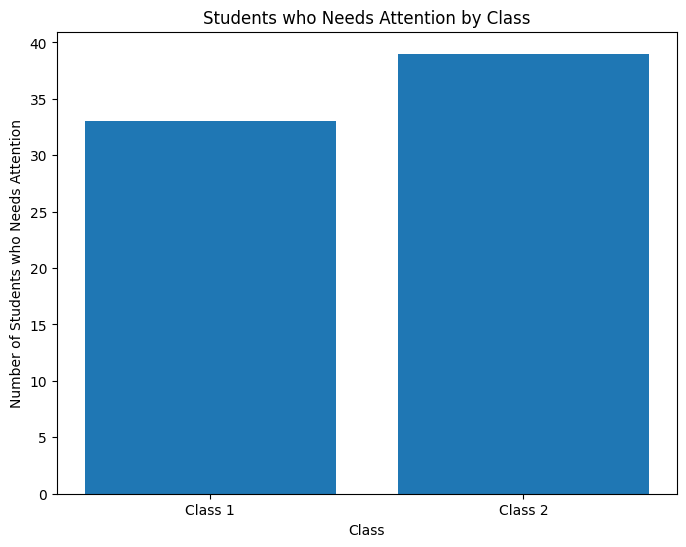

In [61]:
attention_needed_students = all_data[all_data['Attention'] == 'Attention Needed']
attention_needed_counts = attention_needed_students.groupby('Class')['Student Roll Num'].count()

plt.figure(figsize=(8, 6))
plt.bar(attention_needed_counts.index, attention_needed_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Students who Needs Attention')
plt.title('Students who Needs Attention by Class')
plt.show()

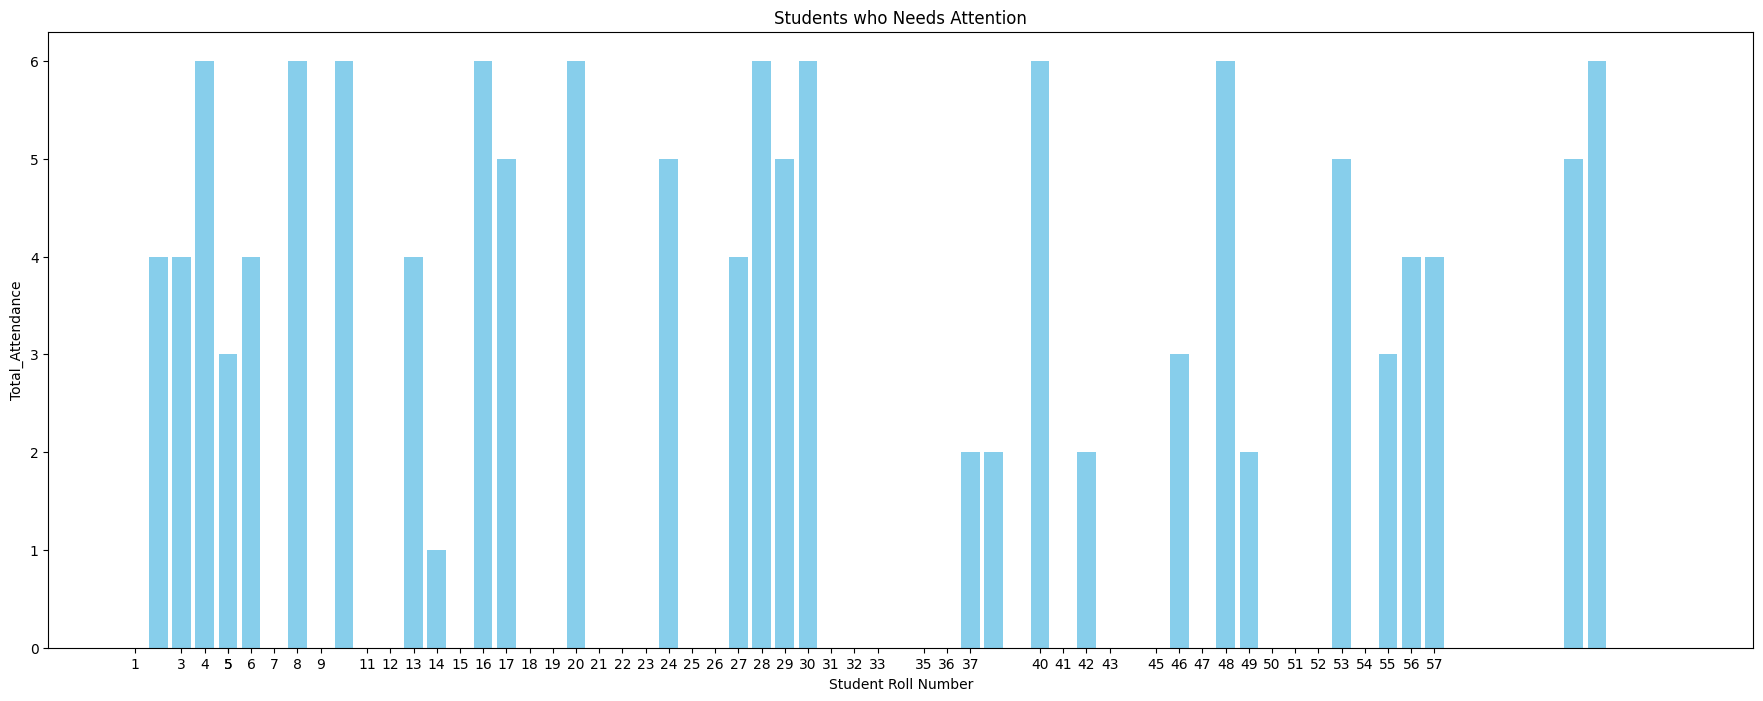

In [64]:
plt.figure(figsize=(22, 8))
plt.bar(attention_needed_students['Student Roll Num'], attention_needed_students['Total_Attendance'], color='skyblue')
plt.xlabel('Student Roll Number')
plt.ylabel('Total_Attendance')
plt.title('Students who Needs Attention')
plt.xticks(very_satisfied_students['Student Roll Num'])
plt.show()

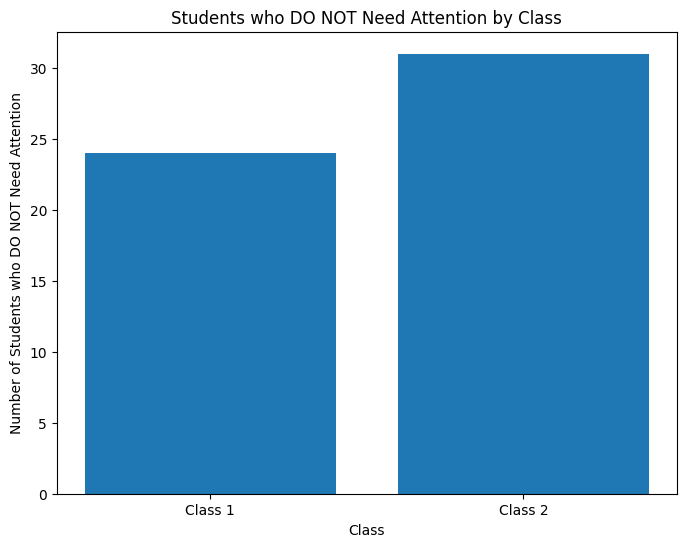

In [65]:
attention_not_needed_students = all_data[all_data['Attention'] == 'Attention Not Needed']
attention_not_needed_counts = attention_not_needed_students.groupby('Class')['Student Roll Num'].count()

plt.figure(figsize=(8, 6))
plt.bar(attention_not_needed_counts.index, attention_not_needed_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Students who DO NOT Need Attention')
plt.title('Students who DO NOT Need Attention by Class')
plt.show()

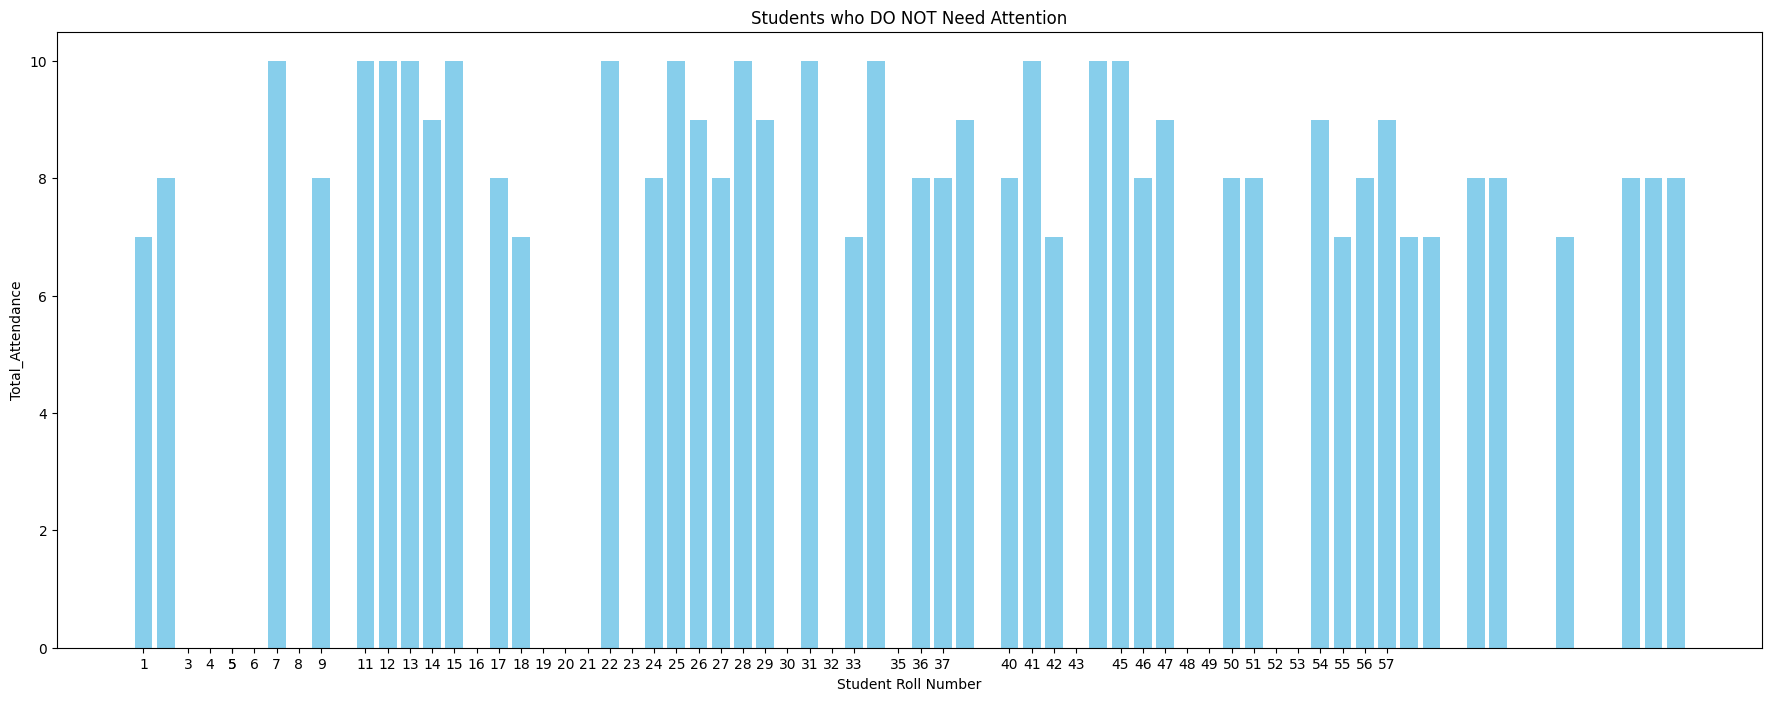

In [66]:
plt.figure(figsize=(22, 8))
plt.bar(attention_not_needed_students['Student Roll Num'], attention_not_needed_students['Total_Attendance'], color='skyblue')
plt.xlabel('Student Roll Number')
plt.ylabel('Total_Attendance')
plt.title('Students who DO NOT Need Attention')
plt.xticks(very_satisfied_students['Student Roll Num'])
plt.show()